## Exploring a dataset in the Notebook

### Provenance of the data

### Downloading and loading a dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
%cd /media/sf_a/repo/collections/minibook-2nd-code/chapter2

/media/sf_a/repo/collections/minibook-2nd-code/chapter2


!wget https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip
!unzip nyc_taxi.zip

In [50]:
%ls data

nyc_data.csv*  nycTaxiFareData2013.torrent*
nyc_fare.csv*  nycTaxiTripData2013.torrent*


In [51]:
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

In [52]:
data = pd.read_csv(data_filename, parse_dates=['pickup_datetime',
                                               'dropoff_datetime'])
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])

In [53]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392


In [54]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


### Making plots with matplotlib

In [55]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [56]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [57]:
p_lng

0        -73.955925
1        -74.005501
2        -73.969955
3        -73.991432
4        -73.966225
5        -73.955238
6        -73.985580
7        -73.999413
8        -73.992180
9        -74.006554
10       -73.972473
11       -74.007263
12       -73.984589
13       -73.987991
14       -74.006111
15       -73.988693
16       -73.982094
17       -73.976822
18       -73.978676
19       -73.986336
20       -73.969917
21       -73.954521
22       -74.002953
23       -74.006683
24       -73.974174
25       -73.979942
26       -73.970970
27       -73.988281
28       -73.997452
29       -73.981506
            ...    
846915   -74.010689
846916   -73.982697
846917   -73.977768
846918   -74.016182
846919   -73.951698
846920   -73.951981
846921   -73.987846
846922   -73.984886
846923   -73.953316
846924   -73.987709
846925   -73.969978
846926   -73.985458
846927   -73.982651
846928   -73.996460
846929   -73.972366
846930   -73.980141
846931   -73.987236
846932   -74.005722
846933   -73.970688


In [58]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [59]:
px, py = lat_lng_to_pixels(p_lat, p_lng)

In [60]:
px

0         29.456688
1         29.442916
2         29.452790
3         29.446824
4         29.453826
5         29.456878
6         29.448450
7         29.444608
8         29.446617
9         29.442624
10        29.452091
11        29.442427
12        29.448725
13        29.447780
14        29.442747
15        29.447585
16        29.449418
17        29.450883
18        29.450368
19        29.448240
20        29.452801
21        29.457078
22        29.443624
23        29.442588
24        29.451618
25        29.450016
26        29.452508
27        29.447700
28        29.445152
29        29.449582
            ...    
846915    29.441475
846916    29.449251
846917    29.450620
846918    29.439949
846919    29.457862
846920    29.457783
846921    29.447821
846922    29.448643
846923    29.457412
846924    29.447859
846925    29.452784
846926    29.448484
846927    29.449264
846928    29.445428
846929    29.452121
846930    29.449961
846931    29.447990
846932    29.442855
846933    29.452587


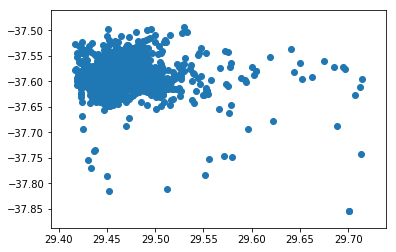

In [61]:
plt.scatter(px, py)

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

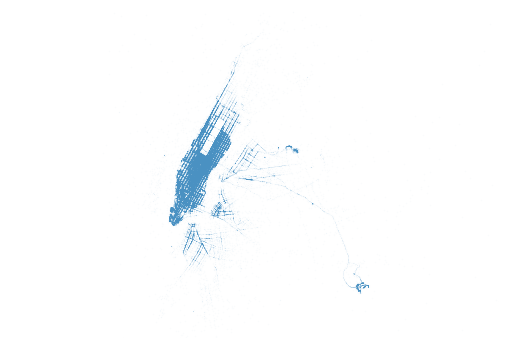

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(px, py, s=.1, alpha=.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off')

### Descriptive statistics with pandas and seaborn

In [63]:
px.count(), px.min(), px.max()

(846945, 29.417137499999995, 29.714313055555561)

In [64]:
px.mean(), px.median(), px.std()

(29.45134580776863, 29.449418333333337, 0.009761694274451149)

!conda install seaborn -q -y

In [65]:
import seaborn as sns
sns.__version__

'0.8.1'

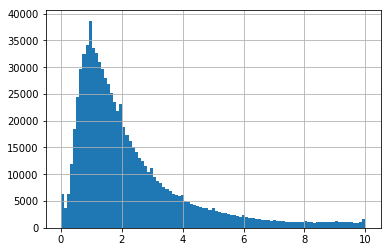

In [66]:
data.trip_distance.hist(bins=np.linspace(0., 10., 100))